In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsp

In [118]:
file_path = "katalog_gempa.csv"
df = pd.read_csv(file_path)

In [119]:
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


In [ ]:
df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,92887.000000,92887.000000,92887.000000,92887.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,-3.404577,119.159707,49.009399,3.592788,170.142852,60.202121,30.358062,197.450303,56.576344,35.250018
std,4.354584,10.833202,76.761070,0.834042,88.359267,19.699252,99.957906,118.920519,21.274923,98.235894
min,-11.000000,94.020000,2.000000,1.000000,0.000000,2.300000,-180.000000,0.000000,1.500000,-180.000000
25%,-7.885000,113.170000,10.000000,3.000000,107.550000,46.950000,-28.500000,63.115000,39.400000,-19.900000
50%,-2.910000,121.160000,16.000000,3.500000,144.600000,62.300000,57.600000,240.720000,58.400000,56.500000
75%,0.140000,126.900000,54.000000,4.200000,217.500000,76.400000,100.150000,297.480000,74.700000,112.600000
max,6.000000,142.000000,750.000000,7.900000,359.200000,90.000000,180.000000,359.980000,90.000000,180.000000


In [122]:
df.isnull().sum()

tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64

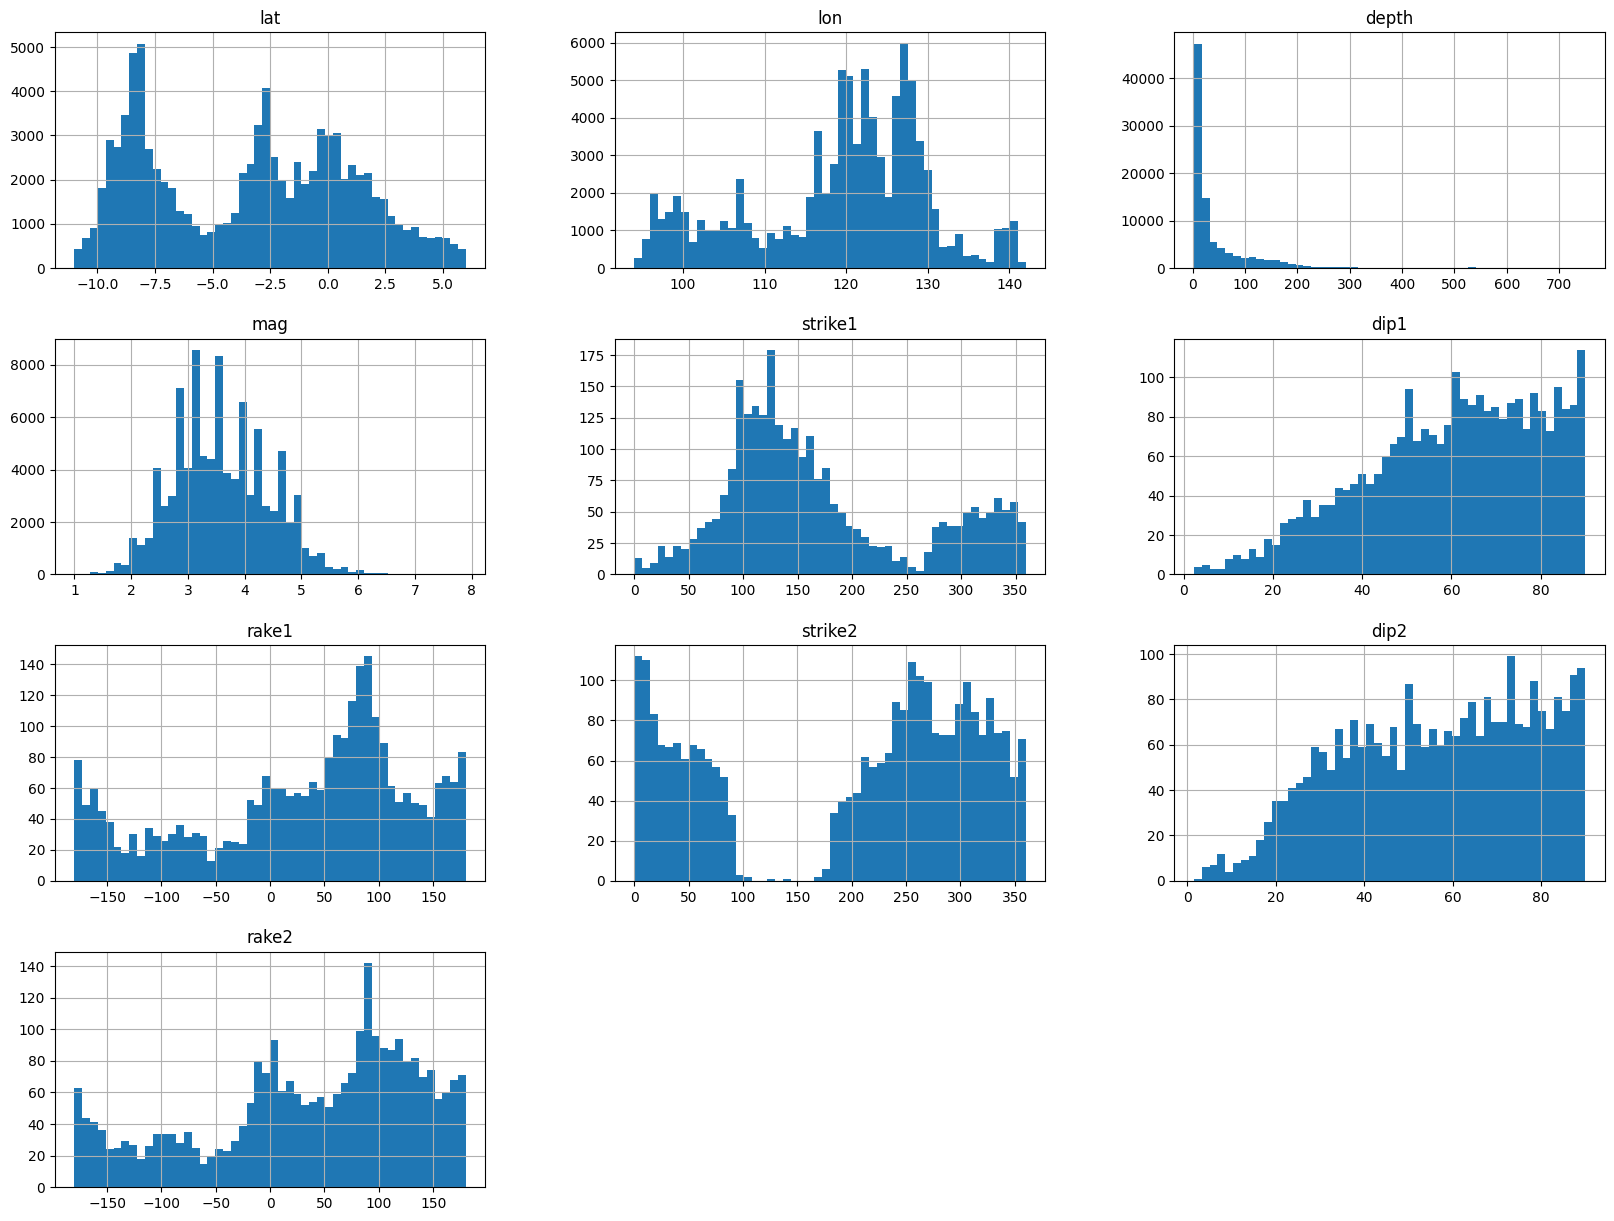

In [123]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='lon', ylabel='lat'>

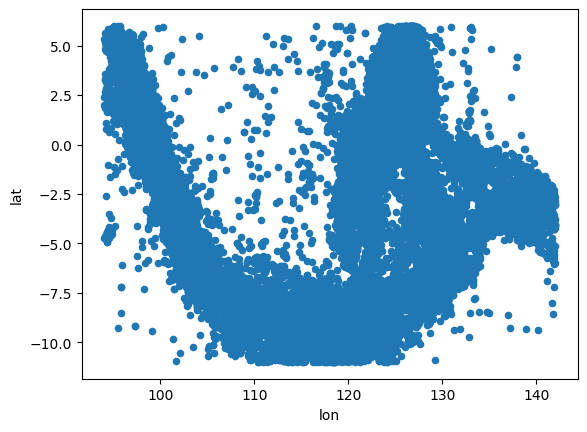

In [124]:
df.plot(kind="scatter", x="lon", y="lat")

<Axes: xlabel='lon', ylabel='lat'>

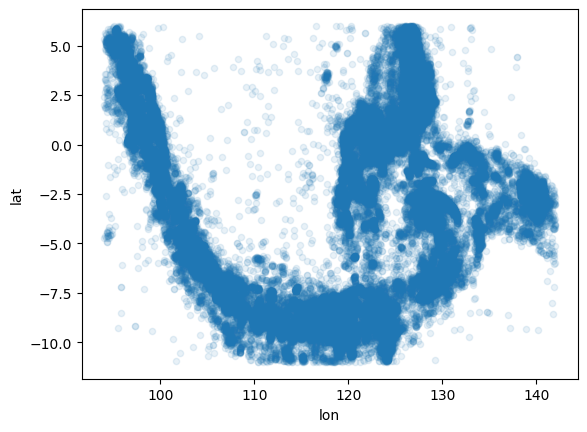

In [125]:
df.plot(kind="scatter", x="lon", y="lat", alpha=0.1)

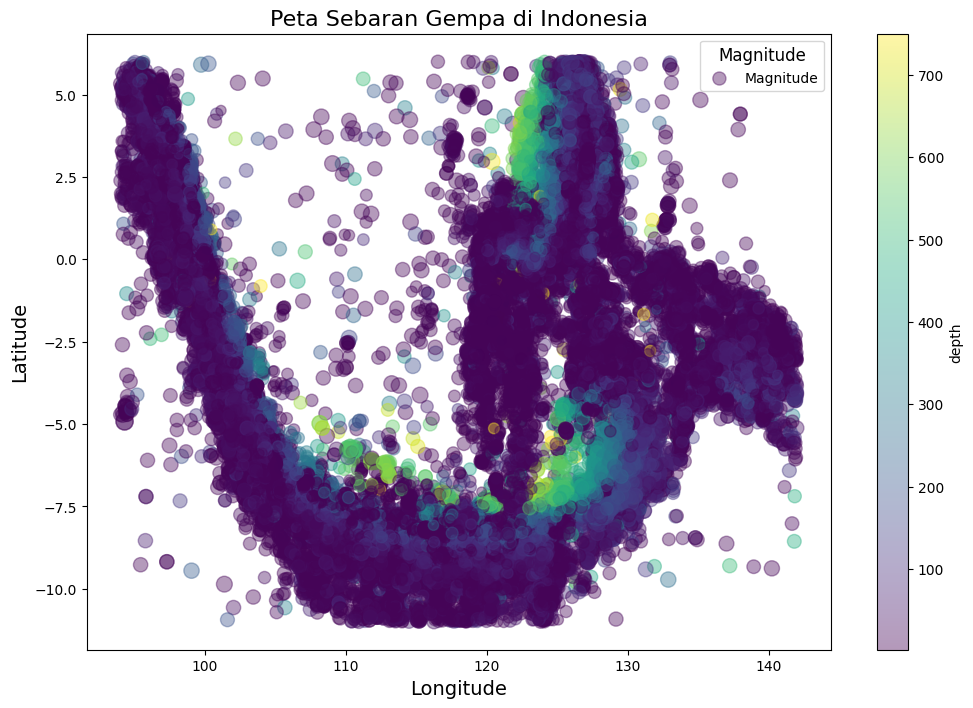

In [126]:
# Plot scatter
df.plot(kind="scatter", x="lon", y="lat", alpha=0.4, 
        s=df["mag"] * 20, label="Magnitude", figsize=(12, 8),
        c="depth", cmap=plt.get_cmap("viridis"), colorbar=True, 
        sharex=False)


plt.title("Peta Sebaran Gempa di Indonesia", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(title="Magnitude", title_fontsize=12, fontsize=10)
plt.show()

C:\Users\ridho\AppData\Local\Temp\ipykernel_20352\565860845.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').size().plot(kind='line', figsize=(12, 6))


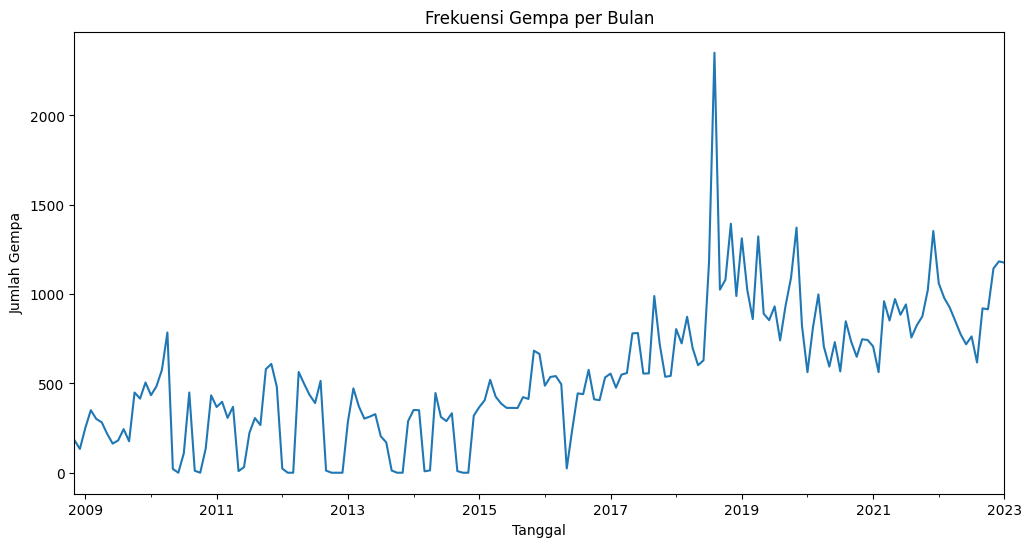

In [127]:
df['tgl'] = pd.to_datetime(df['tgl'])  
df.set_index('tgl', inplace=True)  
df.resample('M').size().plot(kind='line', figsize=(12, 6))  
plt.title('Frekuensi Gempa per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Gempa')
plt.show()

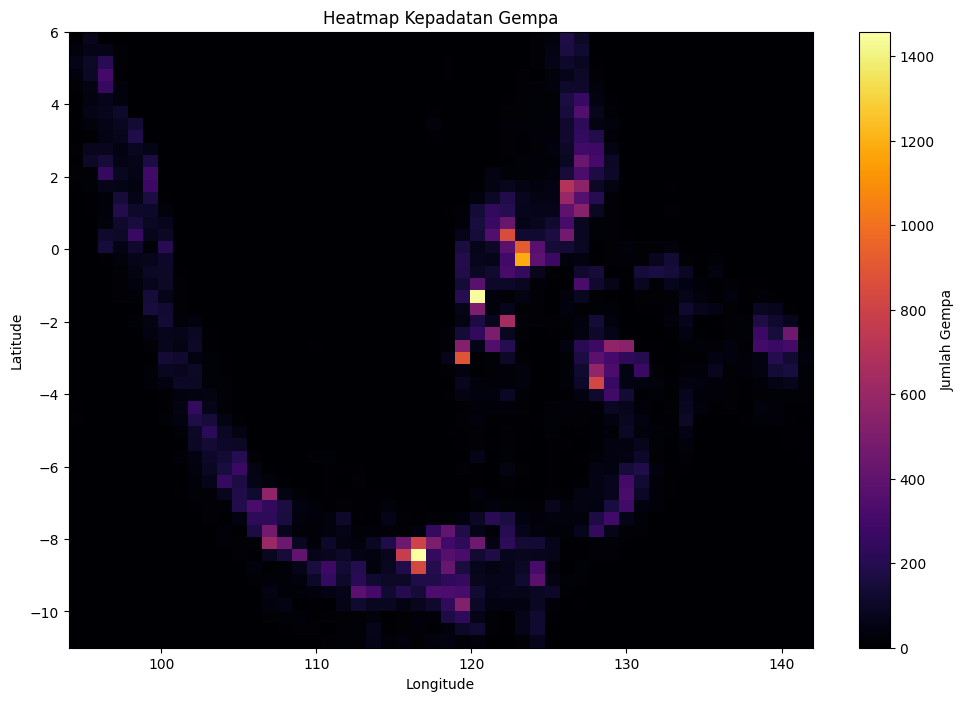

In [128]:
plt.figure(figsize=(12, 8))
plt.hist2d(df['lon'], df['lat'], bins=(50, 50), cmap='inferno')
plt.colorbar(label='Jumlah Gempa')
plt.title('Heatmap Kepadatan Gempa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [97]:
corr_matrix = df.select_dtypes(include=['number']).corr()

In [98]:
corr_matrix["mag"].sort_values(ascending=False)

mag        1.000000
depth      0.235087
lat        0.118029
lon        0.109827
strike2    0.074816
rake2      0.069326
rake1      0.047801
strike1   -0.100745
dip2      -0.125513
dip1      -0.163712
Name: mag, dtype: float64

array([[<Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='strike2', ylabel='mag'>,
        <Axes: xlabel='rake2', ylabel='mag'>,
        <Axes: xlabel='dip2', ylabel='mag'>],
       [<Axes: xlabel='mag', ylabel='strike2'>,
        <Axes: xlabel='strike2', ylabel='strike2'>,
        <Axes: xlabel='rake2', ylabel='strike2'>,
        <Axes: xlabel='dip2', ylabel='strike2'>],
       [<Axes: xlabel='mag', ylabel='rake2'>,
        <Axes: xlabel='strike2', ylabel='rake2'>,
        <Axes: xlabel='rake2', ylabel='rake2'>,
        <Axes: xlabel='dip2', ylabel='rake2'>],
       [<Axes: xlabel='mag', ylabel='dip2'>,
        <Axes: xlabel='strike2', ylabel='dip2'>,
        <Axes: xlabel='rake2', ylabel='dip2'>,
        <Axes: xlabel='dip2', ylabel='dip2'>]], dtype=object)

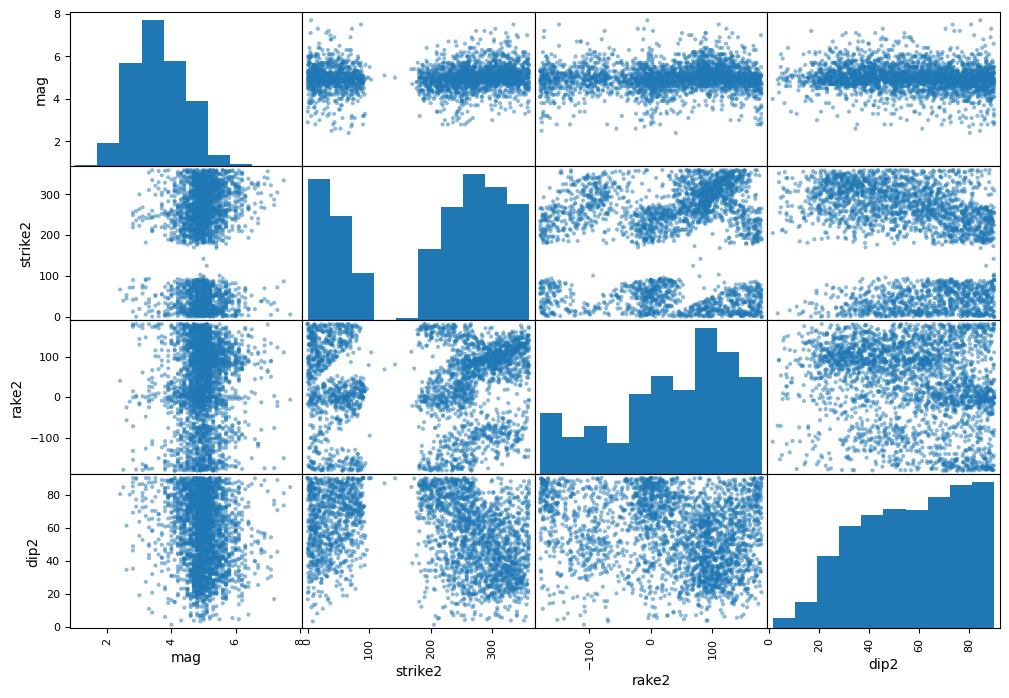

In [101]:
from pandas.plotting import scatter_matrix

attributes = ["mag", "strike2", "rake2",
              "dip2"]
scatter_matrix(df[attributes], figsize=(12, 8))